In [1]:
import turicreate

Assignment: Retrieving Images
This assignment focuses on using deep learning to create nonlinear features to improve the performance of machine learning. You will see how transfer learning techniques are applied to use deep features learned with one dataset to get great performance on a different dataset. You will build models for image retrieval and image classification tasks.

Learning Outcomes
Load and transform real image data
Use the Sketch method to view statistics of data
Build image retrieval models using nearest neighbor search and deep features
Compare the results of various image retrieval models
Use the apply and sum methods to compute functions of the data
Programming Assignment
There are four tasks in this assignment. There are several results you need to gather for the quiz that accompanies this module.

Task 1: Compute summary statistics of the data
Sketch summaries are techniques for computing summary statistics of data very quickly. In Turi Create has a method:

Sketch

which computes summary statistics. Using the training data, compute the sketch summary of the label column and interpret the results by running this command.

sketch = turicreate.Sketch(image_data['label'])

Then look at the sketch object to see the summary statistics.

For more information on Sketch, see:

https://apple.github.io/turicreate/docs/api/generated/turicreate.Sketch.html?highlight=sketch (Links to an external site.)

What is the least common category in the training data?

Save this result to answer the quiz for this module.

Task 2: Create category-specific image retrieval models
In most retrieval tasks, the data are unlabeled, thus you call these unsupervised learning problems. This image dataset has labels, so you will use them to create one model for each of the four image categories, dog, cat, automobile, and bird.

Follow these steps:

Split the training data into 4 different SFrame data structures. Each will contain data for one of the four categories image categories. (Hint: If you use a logical filter to select the rows where the label column equals ‘dog’, you can create an SFrame that contains only the data for images labeled ‘dog’.)

Similarly to the image retrieval notebook you downloaded, you will create a nearest neighbor model using deep features. You will create one such model for each category, using the corresponding subset of the training data. Call the model with the dog images dog_model, the one with the cat images cat_model, as so on.

You now have a nearest neighbors model, dog_model, that can find the nearest dog to any image you give the model. Another model, cat_model, that can find the nearest cat to any image you give it, and so on.

The following cat image is the first in the test data (image_test[0:1]):

first_image_test.png

Using these models, answer the following questions.

What is the nearest cat-labeled image in the training data to the cat image that is the first image in the test data ?
What is the nearest dog-labeled image in the training data to the cat image that is the first image in the test data?
Hint: When you query your nearest neighbors model, it will return a result that looks something like this:

Table 1. Format of data returned by a query
query_label	reference_label	distance	rank
0	34	42.9886641167	1
0	45	43.8444904098	2
0	251	44.2634660468	3
0	141	44.377719559	4
To understand each column in this table, see this documentation (Links to an external site.). The reference_label column is important, since it provides the index of the nearest neighbors in the dataset used to train it. (In this case, the subset of the training data labeled ‘cat’.)

Save these results to answer the quiz for this module.

Task 3: Try a simple example of nearest-neighbors classification
When you queried the nearest neighbors model, the distance column in the Task 2 showed the computed distance between the input and each of the retrieved neighbors. In this task, you will use these distances for classification, using a nearest-neighbors classifier.

For the first image in the test data (image_test[0:1]), compute the mean distance between this image at its five nearest neighbors that are labeled ‘cat’ in the training data (similar to what you did in the previous question).
For the first image in the test data (image_test[0:1]), compute the mean distance between this image at its five nearest neighbors that are labeled ‘dog’ in the training data (similar to what you did in the previous question).
On average, is the first image in the test data closer to its five nearest neighbors in the ‘cat’ data or in the ‘dog’ data?

Save these results to answer the quiz for this module.

Task 4: Compute nearest neighbors accuracy
A nearest neighbor classifier predicts the label of a point as the most common label of its nearest neighbors. In this task, you will measure the accuracy of a 1-nearest-neighbor classifier, i.e., predict the output as the label of the nearest neighbor in the training data. Although there are simpler ways of computing this result, this way introduces you to additional concepts in nearest neighbors and SFrames, which will be useful in your future machine learning education.

Use the four nearest neighbors models you trained previously on the training data, the dog, cat, automobile, and bird models.

Just as you split the training data on label, you will now use the same procedure to split the test data on the cat, dog, automobile, and bird labels. Name the resulting SFrame data structures:

image_test_cat, image_test_dog, image_test_bird, image_test_automobile

Next you'll find nearest neighbors in the training set for each part of the test set

Thus far you queried the nearest neighbors models with a single image as the input, but you can actually query with a whole set of data. The query will find the nearest neighbors for each data point. Note that the input index is stored in the query_label column of the resulting SFrame.

Using this knowledge find the closest neighbor to the dog test data using each of the trained models. For example, this code:

dog_cat_neighbors = cat_model.query(image_test_dog, k=1)

finds one neighbor (i.e., k=1) to the dog test images (image_test_dog) in the cat portion of the training data.

Next, follow the same procedure for the other dog combinations: dog-automobile, dog-bird, and dog-dog.

Create an SFrame with the distances from the dog test examples to the respective nearest neighbors in each class in the training data.

The distance column in dog_cat_neighbors contains the distance between each dog-labeled image in the test set and its nearest cat-labeled image in the training set. The question to answer is: How many of the test set dog images are closer to a dog in the training set than to a cat, automobile, or bird?

Next you will create an SFrame containing just these distances per data point. The goal is to create an SFrame called dog_distances with 4 columns:

dog_distances[‘dog-dog’] ---- storing dog_dog_neighbors[‘distance’]
dog_distances[‘dog-cat’] ---- storing dog_cat_neighbors[‘distance’]
dog_distances[‘dog-automobile’] ---- storing dog_automobile_neighbors[‘distance’]
dog_distances[‘dog-bird’] ---- storing dog_bird_neighbors[‘distance’]
Hint: You can create a new SFrame from the columns of other SFrame structures by creating a dictionary with the new columns, as shown in this example:

news_frame = turicreate.SFrame({'foo': others_frame['foo'],'bar': some_others_frame['bar']})

The resulting SFrame will look similar to this:

Table 2. An SFrame after adding columns from other SFrame structures
dog-automobile	dog-bird	dog-cat	dog-dog
41.9579761457	41.7538647304	36.4196077068	33.4773590373
46.0021331807	41.3382958925	38.8353268874	32.8458495684
42.9462290692	38.6157590853	36.9763410854	35.0397073189
Compute the number of correct predictions using 1-nearest neighbors for the dog class.

Now that you have created dog_distances, you will use the apply method on this SFrame to iterate through each row and compute the number of dog test examples where the distance to the nearest dog image was lower than that to the other image classes.

You will perform three steps:

Consider one row of dog_distances and call this variable row. You can access each distance by calling, for example, row['dog-cat'] which, in the previous table, will have value equal to 36.4196077068 for the first row. Create a function, def is_dog_correct(row):, that returns 1 if the value for row[‘dog-dog’] is lower than that of the other columns, and 0 otherwise. That is, returns 1 if this row is correctly classified by 1-nearest neighbors, and 0 if it is not.

Using the function is_dog_correct(row), you can check if one row is correctly classified. Next, you need to count how many rows are correctly classified. You could use a for loop to iterate through each row and apply the function is_dog_correct(row), but this method is extremely slow. An SFrame is not optimized for this type of operation. Instead, use the apply method to iterate the function is_dog_correct for each row.

Compute the number of correct predictions for dog. You can now call the function dog_distances.apply(is_dog_correct) which returns an SArray structure (a column of data) with a value 1 for every correct row and a value 0 for every incorrect one. You can call the sum method on the result to get the total number of correctly classified dog images in the test set.

Using the work you did in this task, what is the accuracy of the 1-nearest neighbor classifier at classifying dog images from the test set?

NOTE: If you are uncertain that your code is working correctly, you can perform steps 1 and 2 to count the number of correctly classified cat images in the test data. Your result should be 548. This verification will take you some time, so you might do it only if you get the wrong answer on the quiz and can't figure out why. 

Save these results to answer the quiz for this module.

In [2]:
image_data = turicreate.SFrame('/Users/eunheelim/my-env/data/image_train_data/')

In [3]:
image_data

id,image,label,deep_features,image_array
24,Height: 32 Width: 32,bird,"[0.24287176132202148,1.0954537391662598, 0.0, ...","[73.0, 77.0, 58.0, 71.0,68.0, 50.0, 77.0, 69.0, ..."
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
90,Height: 32 Width: 32,bird,"[1.7178692817687988, 0.0,0.0, 0.0, 0.0, 0.0, ...","[216.0, 195.0, 180.0,201.0, 178.0, 160.0, ..."
97,Height: 32 Width: 32,automobile,"[1.5781855583190918, 0.0,0.0, 0.0, 0.0, 0.0, ...","[33.0, 44.0, 27.0, 29.0,44.0, 31.0, 32.0, 45.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
121,Height: 32 Width: 32,bird,"[0.0,0.23753464221954346, ...","[93.0, 96.0, 88.0, 102.0,106.0, 97.0, 117.0, ..."
136,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.57378625869751, ...","[35.0, 59.0, 53.0, 36.0,56.0, 56.0, 42.0, 62.0, ..."
138,Height: 32 Width: 32,bird,"[0.6589357256889343, 0.0,0.0, 0.0, 0.0, 0.0, ...","[205.0, 193.0, 195.0,200.0, 187.0, 193.0, ..."


/Users/eunheelim/my-env/lib/python3.7/site-packages/turicreate/visualization/_plot.py:376: UserWarning: Displaying only the first 100 rows.
  warnings.warn('Displaying only the first {} rows.'.format(maximum_rows))


,SArray
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

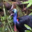
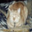
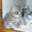
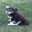
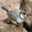
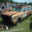
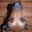
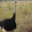
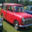
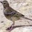
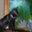
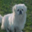
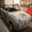
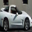
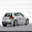
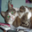
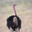
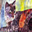
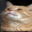
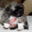
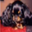
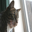
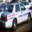
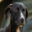
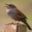
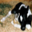
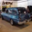
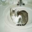
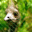
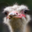
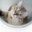
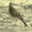
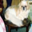
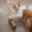
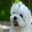
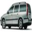
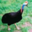
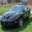
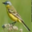
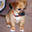
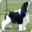
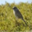
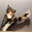
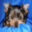
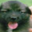
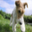
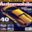
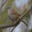
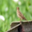
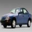
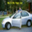
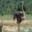
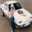
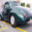
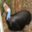
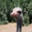
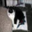
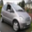
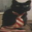
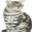
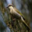
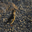
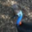
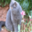
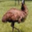
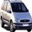
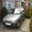
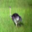
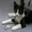
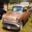
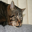
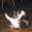
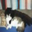
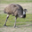
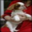
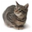
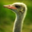
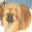
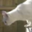
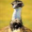
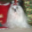
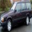
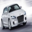
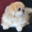
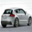
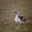
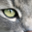
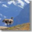
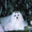
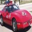
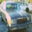
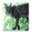
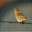
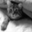
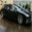
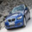
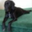
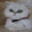
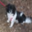
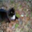

In [4]:
image_data['image'].explore()

## Task 1: Compute summary statistics of the data

In [5]:
sketch = turicreate.Sketch(image_data['label'])

In [6]:
sketch


+------------------+-------+----------+
|       item       | value | is exact |
+------------------+-------+----------+
|      Length      |  2005 |   Yes    |
| # Missing Values |   0   |   Yes    |
| # unique values  |   4   |    No    |
+------------------+-------+----------+

Most frequent items:
+------------+-------+
|   value    | count |
+------------+-------+
|    cat     |  509  |
|    dog     |  509  |
| automobile |  509  |
|    bird    |  478  |
+------------+-------+


## What is the least common category in the training data?: bird

## Task 2: Create category-specific image retrieval models

In [7]:
dog_data = image_data[image_data['label']=='dog']

In [8]:
dog_data

id,image,label,deep_features,image_array
70,Height: 32 Width: 32,dog,"[1.129795789718628, 0.0,0.0, 0.7781944870948792, ...","[154.0, 179.0, 152.0,159.0, 183.0, 157.0, ..."
107,Height: 32 Width: 32,dog,"[0.0, 0.0,0.22067785263061523, ...","[97.0, 51.0, 31.0, 104.0,58.0, 38.0, 107.0, 61.0, ..."
177,Height: 32 Width: 32,dog,"[0.0, 1.4596567153930664,0.0, 0.4229923486709595, ...","[55.0, 75.0, 42.0, 51.0,76.0, 37.0, 57.0, 83.0, ..."
424,Height: 32 Width: 32,dog,"[0.9423996806144714, 0.0,0.22035276889801025, ...","[60.0, 35.0, 18.0, 63.0,49.0, 38.0, 66.0, 56.0, ..."
462,Height: 32 Width: 32,dog,"[1.4346256256103516, 0.0,0.0, 0.0, 0.0, 0.0, ...","[86.0, 69.0, 75.0, 57.0,41.0, 48.0, 46.0, 35.0, ..."
542,Height: 32 Width: 32,dog,"[0.4515470862388611, 0.0,0.0, 0.0, 0.0, 0.0, ...","[196.0, 174.0, 113.0,140.0, 117.0, 65.0, 8 ..."
573,Height: 32 Width: 32,dog,"[0.5923609733581543, 0.0,0.0, 0.0, 0.0, 0.0, ...","[153.0, 103.0, 52.0,151.0, 102.0, 49.0, ..."
851,Height: 32 Width: 32,dog,"[0.690123438835144, 0.0,0.0, 0.0, ...","[39.0, 6.0, 4.0, 53.0,23.0, 24.0, 57.0, 37.0, ..."
919,Height: 32 Width: 32,dog,"[0.0,0.17755866050720215, ...","[29.0, 43.0, 4.0, 24.0,35.0, 6.0, 24.0, 37.0, ..."
1172,Height: 32 Width: 32,dog,"[0.517601490020752, 0.0,1.9641833305358887, 0.0, ...","[182.0, 180.0, 197.0,196.0, 192.0, 209.0, ..."


In [9]:
cat_data = image_data[image_data['label']=='cat']

In [10]:
cat_data

id,image,label,deep_features,image_array
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
159,Height: 32 Width: 32,cat,"[0.0, 0.0, 0.0,0.6432753205299377, 0.0, ...","[154.0, 145.0, 135.0,152.0, 144.0, 135.0, ..."
331,Height: 32 Width: 32,cat,"[0.0, 0.0,0.5109639167785645, 0.0, ...","[45.0, 65.0, 92.0, 72.0,95.0, 110.0, 106.0, ..."
367,Height: 32 Width: 32,cat,"[1.3865805864334106, 0.0,0.0, 0.0, 0.0, ...","[168.0, 151.0, 143.0,145.0, 130.0, 124.0, ..."
384,Height: 32 Width: 32,cat,"[1.0440353155136108, 0.0,0.0, 0.0, 0.0, 0.0, ...","[46.0, 45.0, 50.0, 47.0,45.0, 51.0, 45.0, 44.0, ..."
494,Height: 32 Width: 32,cat,"[0.0, 0.0539512038230896,1.9574512243270874, 0.0, ...","[26.0, 34.0, 29.0, 24.0,29.0, 25.0, 33.0, 43.0, ..."
597,Height: 32 Width: 32,cat,"[0.0, 0.0,0.04706370830535889, ...","[133.0, 153.0, 138.0,126.0, 146.0, 136.0, ..."
788,Height: 32 Width: 32,cat,"[0.5058419108390808, 0.0,0.0, 0.0, ...","[184.0, 200.0, 197.0,189.0, 203.0, 200.0, ..."
882,Height: 32 Width: 32,cat,"[0.0, 0.0,0.15620028972625732, ...","[141.0, 133.0, 112.0,143.0, 133.0, 113.0, ..."


In [11]:
auto_data = image_data[image_data['label']=='automobile']

In [12]:
bird_data = image_data[image_data['label']=='bird']

In [13]:
dog_knn_model =  turicreate.nearest_neighbors.create(dog_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

In [14]:
cat_knn_model =  turicreate.nearest_neighbors.create(cat_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

In [47]:
automobile_knn_model =  turicreate.nearest_neighbors.create(auto_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

In [16]:
bird_knn_model =  turicreate.nearest_neighbors.create(bird_data,
                                               features = ['deep_features'],
                                               label = 'id')

Starting brute force nearest neighbors model training.

## Import test data

In [17]:
test_data = turicreate.SFrame('/Users/eunheelim/my-env/data/image_train_data/image_test_data/')

In [18]:
test_data

id,image,label,deep_features,image_array
0,Height: 32 Width: 32,cat,"[1.1346900463104248, 0.0,0.0, 0.0, ...","[158.0, 112.0, 49.0,159.0, 111.0, 47.0, ..."
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
8,Height: 32 Width: 32,cat,"[0.0, 0.0,0.034419238567352295, ...","[23.0, 19.0, 23.0, 19.0,21.0, 28.0, 21.0, 16.0, ..."
9,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 11.6065092086792, ...","[217.0, 215.0, 209.0,210.0, 208.0, 202.0, ..."
12,Height: 32 Width: 32,dog,"[0.3223174810409546, 0.0,1.2493335008621216, 0.0, ...","[91.0, 64.0, 30.0, 82.0,58.0, 30.0, 87.0, 73.0, ..."
16,Height: 32 Width: 32,dog,"[0.0, 0.0,0.34735703468322754, ...","[95.0, 76.0, 78.0, 92.0,77.0, 78.0, 89.0, 77.0, ..."
24,Height: 32 Width: 32,dog,"[1.3155765533447266, 0.0,0.0, 0.0, 0.0, 0.0, ...","[136.0, 134.0, 118.0,142.0, 141.0, 126.0, ..."
25,Height: 32 Width: 32,bird,"[0.0,0.31728875637054443, ...","[100.0, 103.0, 74.0,68.0, 91.0, 65.0, 116.0, ..."
31,Height: 32 Width: 32,dog,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 9.260188102722168, ...","[127.0, 130.0, 81.0,130.0, 133.0, 88.0, ..."
33,Height: 32 Width: 32,dog,"[0.1307867169380188,0.7276672124862671, 0.0, ...","[118.0, 113.0, 81.0,122.0, 117.0, 83.0, ..."


,SArray
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

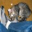
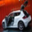
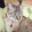
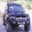
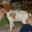
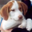
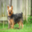
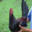
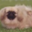
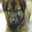
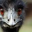
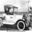
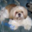
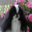
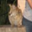
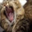
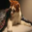
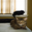
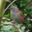
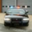
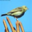
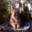
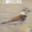
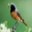
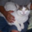
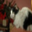
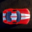
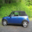
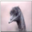
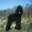
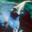
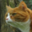
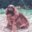
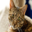
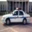
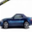
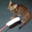
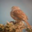
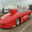
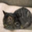
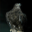
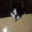
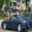
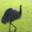
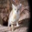
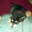
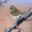
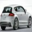
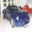
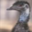
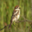
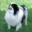
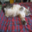
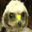
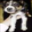
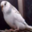
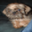
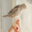
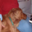
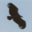
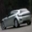
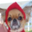
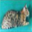
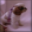
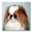
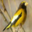
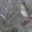
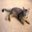
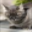
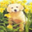
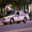
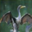
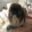
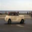
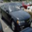
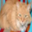
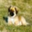
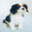
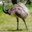
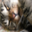
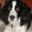
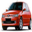
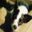
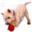
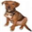
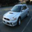
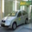
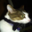
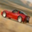
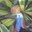
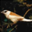
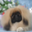
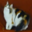
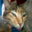
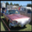
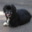
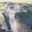
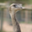
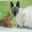
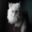

In [19]:
test_data['image'].explore()

,id,image,label,deep_features,image_array
0,0,,cat,"[1.1346900463104248, 0.0, 0.0, 0.0, 0.03664976358413696, 0.0, 9.353598594665527, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3807746171951294, 0.19604480266571045, 0.49913910031318665, 0.0, 0.6409578919410706, 0.0, 0.7487727403640747, 0.0, 0.0, 0.0, 0.21078139543533325, 0.8158698081970215, 0.0, 0.0, 0.0, 0.0, 0.7258063554763794, 0.07810157537460327, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5415886640548706, 0.0, 0.0, 1.3465909957885742, 0.0, 1.0266674757003784, 0.0, 0.0, 0.0, 0.18154239654541016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.48050999641418457, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.960645318031311, 0.9239095449447632, 0.0, 2.424736261367798, 0.0, 0.0, 0.0, 0.0, 0.0, 3.5506184101104736, 0.0, 0.0, 1.3895796537399292, 0.0, 0.0, 0.0, 0.9751324653625488, 0.5319417715072632, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3387210369110107, 0.6500557661056519, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...]","[158.0, 112.0, 49.0, 159.0, 111.0, 47.0, 165.0, 116.0, 51.0, 166.0, 118.0, 53.0, 160.0, 112.0, 46.0, 156.0, 109.0, 41.0, 162.0, 115.0, 47.0, 159.0, 113.0, 45.0, 158.0, 111.0, 44.0, 159.0, 113.0, 41.0, 161.0, 116.0, 41.0, 160.0, 111.0, 52.0, 161.0, 111.0, 49.0, 166.0, 117.0, 41.0, 169.0, 117.0, 45.0, 170.0, 119.0, 44.0, 167.0, 117.0, 40.0, 162.0, 113.0, 38.0, 160.0, 111.0, 39.0, 160.0, 112.0, 43.0, 156.0, 109.0, 44.0, 149.0, 107.0, 45.0, 150.0, 107.0, 45.0, 148.0, 106.0, 43.0, 149.0, 107.0, 44.0, 143.0, 101.0, 39.0, 140.0, 98.0, 43.0, 141.0, 97.0, 41.0, 143.0, 97.0, 38.0, 137.0, 95.0, 36.0, 126.0, 91.0, 36.0, 116.0, 85.0, 33.0, 152.0, 112.0, 51.0, 151.0, ...]"

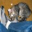

In [31]:
test_data[0:1].explore()

In [21]:
def get_images_from_ids(query_result):
    return image_data.filter_by(query_result['reference_label'],'id')

In [22]:
cat = test_data[0:1]

In [23]:
cat_neighbors = get_images_from_ids(cat_knn_model.query(cat))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 5.764ms      |

| Done         |         | 100         | 33.69ms      |

+--------------+---------+-------------+--------------+

In [36]:
from statistics import mean 
mean(cat_knn_model.query(cat)['distance'])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 13.519ms     |

| Done         |         | 100         | 72.692ms     |

+--------------+---------+-------------+--------------+

36.15573070978294

,SArray
0,
1,
2,
3,
4,

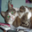
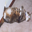
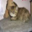
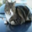
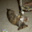

In [24]:
cat_neighbors['image'].explore()

In [30]:
 dog_knn_model.query(test_data[0:1])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 10.931ms     |

| Done         |         | 100         | 52.799ms     |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,16976,37.464262878423774,1
0,13387,37.56668321685285,2
0,35867,37.60472670789396,3
0,44603,37.70655851529755,4
0,6094,38.511325490739715,5


In [28]:
dog_neighbors=get_images_from_ids(dog_knn_model.query(test_data[0:1]))

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 8.179ms      |

| Done         |         | 100         | 38.215ms     |

+--------------+---------+-------------+--------------+

,SArray
0,
1,
2,
3,
4,

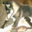
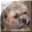
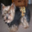
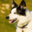
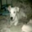

In [29]:
dog_neighbors['image'].explore()

In [27]:
dog_neighbors

id,image,label,deep_features,image_array
6094,Height: 32 Width: 32,dog,"[0.470533549785614, 0.0,0.0, 0.0, 0.0, 0.0, ...","[91.0, 98.0, 71.0, 138.0,123.0, 63.0, 135.0, ..."
13387,Height: 32 Width: 32,dog,"[0.36649417877197266,0.0, 0.0, 0.0, 0.0, 0.0, ...","[255.0, 255.0, 255.0,255.0, 255.0, 255.0, ..."
16976,Height: 32 Width: 32,dog,"[0.7555953860282898, 0.0,0.0, 0.0, 0.0, 0.0, ...","[16.0, 17.0, 11.0, 18.0,19.0, 13.0, 20.0, 21.0, ..."
35867,Height: 32 Width: 32,dog,"[0.3053213953971863, 0.0,0.0, 0.0, 0.0, 0.0, ...","[101.0, 93.0, 9.0, 93.0,88.0, 9.0, 90.0, 86.0, ..."
44603,Height: 32 Width: 32,dog,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 11.264665603637695, ...","[8.0, 25.0, 9.0, 29.0,39.0, 22.0, 66.0, 75.0, ..."


In [37]:
mean(dog_knn_model.query(cat)['distance'])

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.196464    | 9.565ms      |

| Done         |         | 100         | 53.296ms     |

+--------------+---------+-------------+--------------+

37.77071136184157

## Task 4

In [38]:
image_test_cat = test_data[test_data['label']=='cat']
image_test_dog = test_data[test_data['label']=='dog']
image_test_bird = test_data[test_data['label']=='bird']
image_test_automobile = test_data[test_data['label']=='automobile']

In [39]:
image_test_automobile

id,image,label,deep_features,image_array
6,Height: 32 Width: 32,automobile,"[0.2313588261604309, 0.0,0.0, 0.0, 0.0, ...","[160.0, 37.0, 13.0,185.0, 49.0, 11.0, 20 ..."
9,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 11.6065092086792, ...","[217.0, 215.0, 209.0,210.0, 208.0, 202.0, ..."
37,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 8.874865531921387, ...","[255.0, 255.0, 255.0,255.0, 255.0, 255.0, ..."
66,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 8.66312026977539, ...","[109.0, 65.0, 29.0, 84.0,65.0, 46.0, 100.0, 10 ..."
81,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0,0.6001682877540588, 0.0, ...","[2.0, 2.0, 13.0, 0.0,0.0, 12.0, 0.0, 0.0, ..."
82,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0,0.97667396068573, ...","[45.0, 70.0, 27.0, 49.0,76.0, 31.0, 62.0, 81.0, ..."
104,Height: 32 Width: 32,automobile,"[0.6824313402175903,0.5678311586380005, 0.0, ...","[245.0, 250.0, 244.0,245.0, 249.0, 244.0, ..."
105,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0,3.4514405727386475, ...","[255.0, 255.0, 255.0,252.0, 252.0, 252.0, ..."
114,Height: 32 Width: 32,automobile,"[0.0, 0.0, 0.0, 0.0, 0.0,0.0, 7.495393753051758, ...","[199.0, 209.0, 210.0,195.0, 205.0, 206.0, ..."
122,Height: 32 Width: 32,automobile,"[0.0, 0.5649868249893188,0.0, 1.6784172058105469, ...","[51.0, 71.0, 34.0, 47.0,66.0, 33.0, 40.0, 66.0, ..."


In [41]:
dog_cat_neighbors = cat_knn_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 358.999ms    |

| Done         | 509000  | 100         | 481.914ms    |

+--------------+---------+-------------+--------------+

In [50]:
dog_cat_neighbors['distance']

dtype: float
Rows: 1000
[36.419607706754384, 38.83532688735542, 36.97634108541546, 34.575007291446106, 34.77882479101661, 35.11715782924591, 40.60958309132649, 39.90368673062214, 38.067470016821176, 42.72587329506032, 40.07334854106311, 31.6633518591745, 37.71246671323843, 39.09035764803644, 49.57967416577316, 36.077387742837814, 36.50902452301206, 44.95243961942733, 33.43682808174037, 34.324555517253536, 34.71470962990656, 33.237477416853, 34.425383319771534, 34.513042315930164, 37.98423988436167, 41.93783581252017, 39.475533158754054, 37.613473496084154, 36.460960993307644, 32.5445832313346, 36.831355406189786, 37.8590258146085, 41.781173252799256, 35.53207404381256, 33.121153846624495, 34.95202883174984, 33.21653861184684, 30.27480523958585, 35.2565724242629, 36.648458251983065, 33.676383475677746, 32.426395075244464, 39.64035075870523, 44.351332458546096, 38.26287205696334, 37.19424574382699, 38.41620975302148, 33.47475697302676, 35.28479579259476, 43.05319736547563, 31.58689862845

,SArray
0,
1,
2,
3,
4,
5,
6,
7,
8,
9,

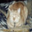
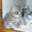
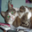
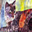
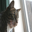
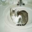
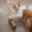
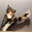
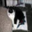
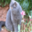
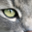
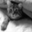
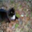
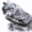
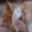
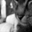
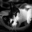
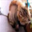
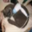
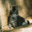
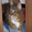
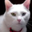
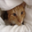
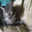
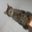
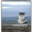
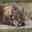
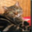
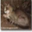
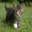
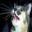
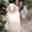
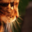
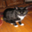
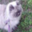
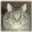
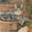
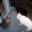
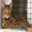
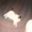
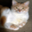
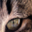
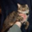
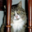
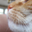
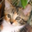
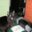
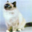
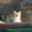
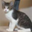
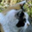
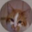
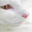
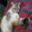
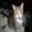
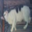
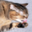
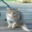
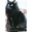
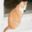
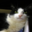
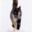
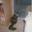
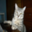
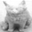
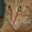
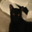
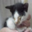
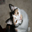
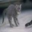
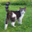
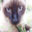
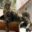
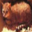
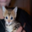
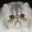
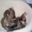
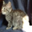
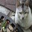
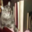
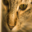
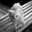
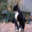
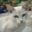
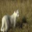
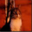
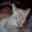
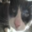
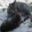
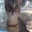
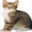
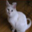
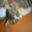
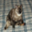
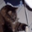
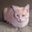
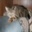
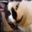
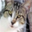
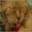

In [44]:
get_images_from_ids(dog_cat_neighbors)['image'].explore()

In [45]:
get_images_from_ids(dog_cat_neighbors)

id,image,label,deep_features,image_array
33,Height: 32 Width: 32,cat,"[0.5250879526138306, 0.0,0.0, 0.0, 0.0, 0.0, ...","[7.0, 5.0, 8.0, 7.0, 5.0,8.0, 5.0, 4.0, 6.0, 7.0, ..."
36,Height: 32 Width: 32,cat,"[0.5660159587860107, 0.0,0.0, 0.0, 0.0, 0.0, ...","[169.0, 122.0, 65.0,131.0, 108.0, 75.0, ..."
331,Height: 32 Width: 32,cat,"[0.0, 0.0,0.5109639167785645, 0.0, ...","[45.0, 65.0, 92.0, 72.0,95.0, 110.0, 106.0, ..."
367,Height: 32 Width: 32,cat,"[1.3865805864334106, 0.0,0.0, 0.0, 0.0, ...","[168.0, 151.0, 143.0,145.0, 130.0, 124.0, ..."
494,Height: 32 Width: 32,cat,"[0.0, 0.0539512038230896,1.9574512243270874, 0.0, ...","[26.0, 34.0, 29.0, 24.0,29.0, 25.0, 33.0, 43.0, ..."
597,Height: 32 Width: 32,cat,"[0.0, 0.0,0.04706370830535889, ...","[133.0, 153.0, 138.0,126.0, 146.0, 136.0, ..."
882,Height: 32 Width: 32,cat,"[0.0, 0.0,0.15620028972625732, ...","[141.0, 133.0, 112.0,143.0, 133.0, 113.0, ..."
1252,Height: 32 Width: 32,cat,"[1.5785075426101685, 0.0,0.0, 0.0, 0.0, 0.0, ...","[217.0, 209.0, 207.0,216.0, 208.0, 205.0, ..."
1696,Height: 32 Width: 32,cat,"[0.0, 0.0,0.10998433828353882, ...","[12.0, 12.0, 12.0, 18.0,18.0, 18.0, 58.0, 58.0, ..."
1846,Height: 32 Width: 32,cat,"[0.0,0.0075675249099731445, ...","[60.0, 69.0, 42.0, 54.0,66.0, 38.0, 71.0, 99.0, ..."


In [52]:
dog_cat_neighbors = cat_knn_model.query(image_test_dog, k=1)
dog_automobile_neighbors = automobile_knn_model.query(image_test_dog, k=1)
dog_bird_neighbors = bird_knn_model.query(image_test_dog, k=1)
dog_dog_neighbors = dog_knn_model.query(image_test_dog, k=1)

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 63000   | 12.3772     | 262.604ms    |

| Done         | 509000  | 100         | 302.648ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 457.602ms    |

| Done         | 509000  | 100         | 560.505ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 59000   | 12.3431     | 227.605ms    |

| Done         | 478000  | 100         | 277.982ms    |

+--------------+---------+-------------+--------------+

Starting blockwise querying.

max rows per data block: 4348

number of reference data blocks: 8

number of query data blocks: 1

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 1000         | 64000   | 12.5737     | 347.373ms    |

| Done         | 509000  | 100         | 495.123ms    |

+--------------+---------+-------------+--------------+

In [58]:
dog_distances = turicreate.SFrame({'dog_automobile':dog_automobile_neighbors['distance'], 'dog-bird':dog_bird_neighbors['distance'], 'dog-cat':dog_cat_neighbors['distance'], 'dog-dog':dog_dog_neighbors['distance']})



In [59]:
dog_distances

dog-bird,dog-cat,dog-dog,dog_automobile
41.75386473035126,36.419607706754384,33.47735903726335,41.95797614571203
41.3382958924861,38.83532688735542,32.84584956840554,46.00213318067788
38.615759085289056,36.97634108541546,35.03970731890584,42.946229069238804
37.08922699538214,34.575007291446106,33.90103276968193,41.68660600484793
38.27228869398105,34.77882479101661,37.484925090925636,39.22696649347584
39.146208923590486,35.11715782924591,34.94516534398124,40.58451176980721
40.523040105962316,40.60958309132649,39.095727834463545,45.10673529610854
38.19479183926956,39.90368673062214,37.76961310322034,41.32211409739762
40.156713166131446,38.067470016821176,35.10891446032838,41.82446549950164
45.55979626027668,42.72587329506032,43.242283258453455,45.497692940110376


In [61]:
def is_dog_correct(row):
    if (row['dog-dog'] < row ['dog_automobile']) & (row['dog-dog'] < row ['dog-cat']) & (row['dog-dog'] < row ['dog-bird']):
        return 1
    else:
        return 0
    

In [62]:
dog_distances.apply(is_dog_correct)

dtype: int
Rows: 1000
[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, ... ]

In [63]:
dog_distances.apply(is_dog_correct).sum()

678

In [64]:
dog_distances.apply(is_dog_correct).sum()/len(dog_distances)*100

67.80000000000001